In [1]:
import os
# change working directory
root_dir = os.path.join(os.getcwd(), '..')
os.chdir(root_dir)

In [2]:
os.getcwd(), os.listdir(os.getcwd())

('/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA',
 ['paper',
  'notebooks',
  '.git',
  'Sample_Code',
  'data',
  'src',
  'LICENSE',
  'README.md',
  '.gitignore',
  'notes.txt'])

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
from src.utils import get_dataset

In [4]:
data_path = os.path.join(os.getcwd(),'data')
os.listdir(data_path)

['Depth', 'Inertial', 'Skeleton']

In [5]:
depth_paths, inertial_paths, skeleton_paths = get_dataset(data_path)

In [88]:
num = 450

In [89]:
depth_name = depth_paths[num]
depth_test = sio.loadmat(depth_name)
depth_test_name = depth_name.split('/')[-1].split('.')[0]

In [90]:
depth_info = depth_test['d_depth']

In [91]:
depth_info.shape

(240, 320, 67)

In [92]:
from matplotlib import animation

<IPython.core.display.Javascript object>


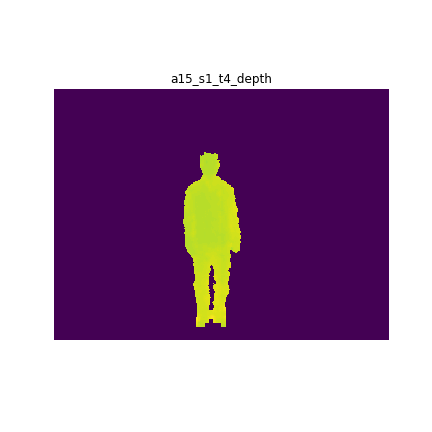

In [93]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize = (6,6))

ax = plt.axes()
ax.set_title(depth_test_name)
ax.set_axis_off()
im = plt.imshow(depth_info[:,:,0])

def init():
    im.set_data(depth_info[:,:,0])
    return [im]

def animate(i):
    im.set_array(depth_info[:,:,i])
    return [im]

ani = animation.FuncAnimation(fig, animate, init_func=init, frames = depth_info.shape[-1],interval = 50, blit = True)
ani.save('animate.gif', writer='imagemagick', fps=20)
plt.show()

In [83]:
skeleton_test = sio.loadmat(skeleton_paths[num])
skeleton_info = skeleton_test['d_skel']
skeleton_info.shape

(20, 3, 55)

<IPython.core.display.Javascript object>


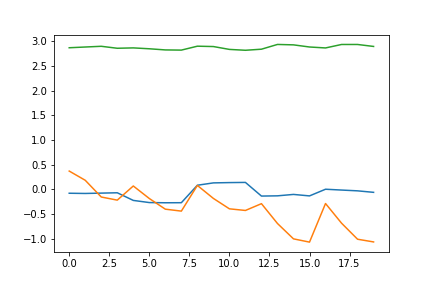

In [86]:
plt.plot(skeleton_info[:,:,2])